<img src="titanic.jpg" width="" align="" />

# Titanic

Using the Titanic dataset from Kaggle. I'm building this notebook after completing chapter 2 of Hands on Machine Learning, which covers how to complete an end-to-end machine learning project. 

- Titanic tutorial from Alexis Cook

# Frame the problem

Objective: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 

- It seems some groups of people were more likely to survive than others. 

- Answer the question: "what sorts of people were more likely to survive?" using passenger data (e.g. name, age, gender, socio-economic class, etc.). 

# Get the data

## Datasets

1) train.csv: subset of passengers (n=891) for training. 

The value in the column Survived indicate whether the passenger survived or not (survived=1, died=0). 

2) test.csv: subset of passengers for testing (n=418).  

3) gender_submission.csv: example to show how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. 

Your submission file should contained a PassengerID column (containing the ID of each passenger from test.csv) and a Survived column, where survived=1 and died=0.

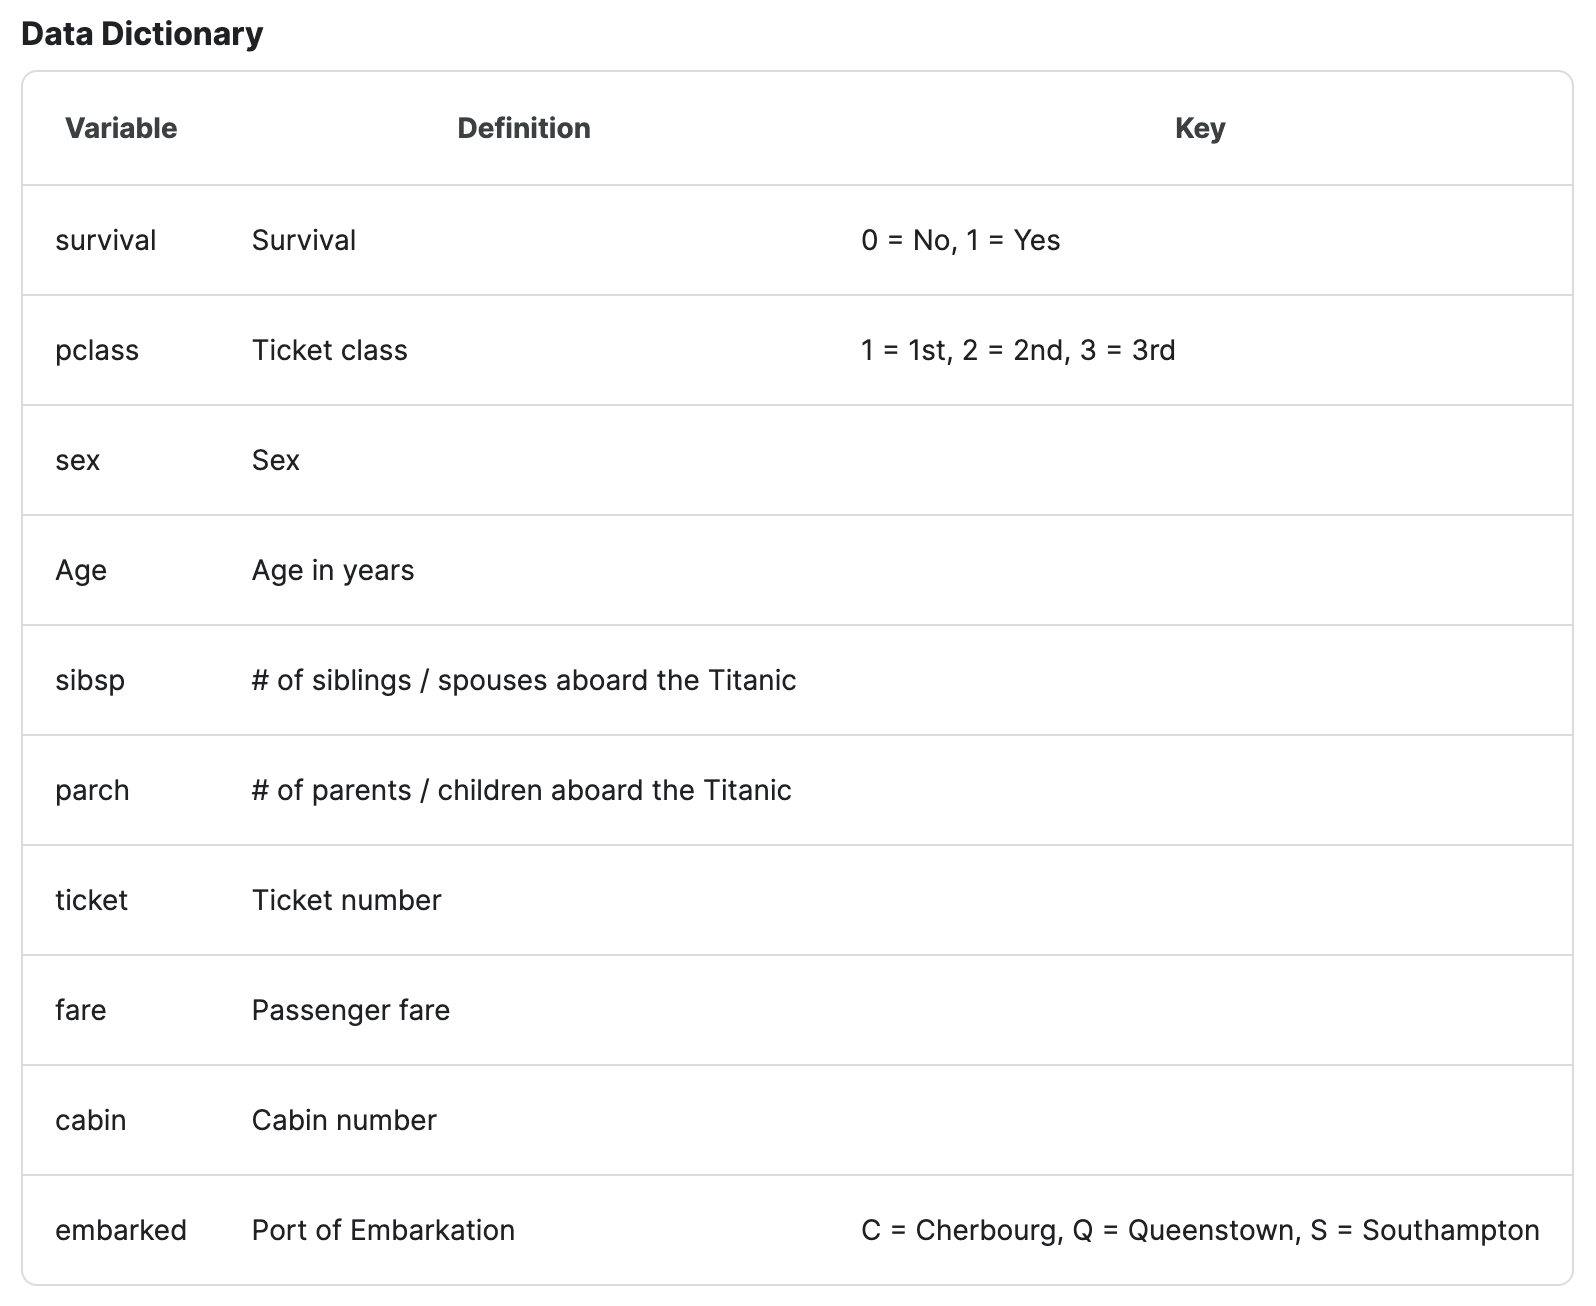

In [ ]:
import IPython.display as display
display.Image('datasets/data_dictionary.png')

In [ ]:
# Creata dataframes from CSV files 
import pandas as pd 
import numpy as np

train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
gender_submission = pd.read_csv('datasets/gender_submission.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Examine the data 

In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Examine categorical variables 
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train['Ticket'].value_counts() # Not sure if this is valuable for the model 

347082        7
1601          7
CA. 2343      7
347088        6
3101295       6
             ..
226593        1
362316        1
2629          1
A/4. 34244    1
113510        1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
train['Cabin'].value_counts() # Not sure if this is valuable for the model 

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
F33            3
              ..
B37            1
A24            1
C106           1
A16            1
C95            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train['Embarked'].value_counts() # Might be useful, probably needs one-hot encoding

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Examine numerical variables 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

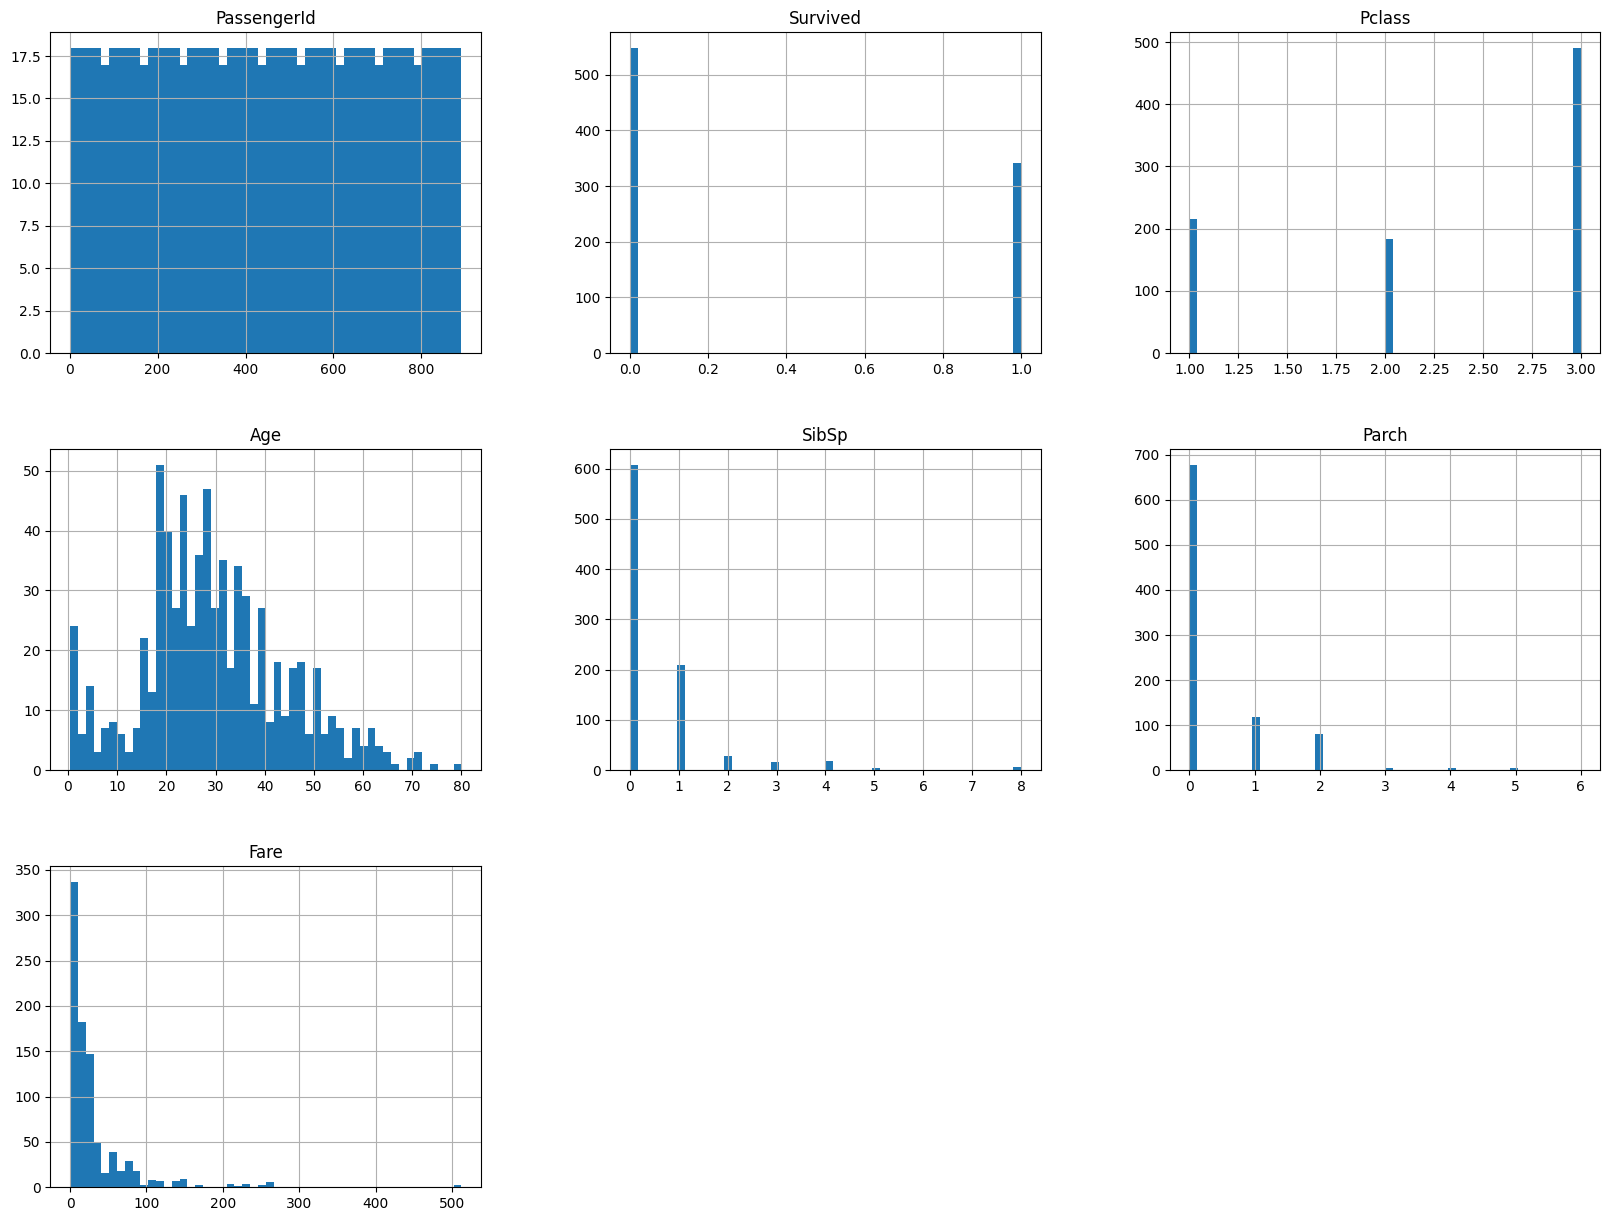

In [ ]:
# See numerical variable distributions 
train.hist(bins=50, figsize=(20, 15))

Observations on the data: 

- Many numerical variables are really more categorical. So, we should One-Hot or Ordinal Encoding to transform them before training our model (Ordinal: Pclass, SibSp, Parch). 

- Fare and Age have very different scales, we can fix this using feature scaling. 

- Fare and Age are also fairly tail-heavy. Can we transform them to have more bell-shaped distributions? 

- PassengerId should not be used for training, seems pretty useless. 

We do not need to create a test set, one has already been created for us: test.csv

- Normally if I were to create a test set, I'd attempt to do some sort of stratified sampling along a single variable to make sure there was an equal distribution of that variable in both train and test datasets (note: attempting to stratify based on multiple variables would be overly complex - StackExchange and Scribbr)

# Explore the data to gain insights 

Potential ways to conduct exploratory data analysis: 

- Create boxplot/violinplot/swarmplot of different numerical attributes for different classes of the target variable. This helps identify potential relationships and dependencies that could impact the target. 

In [ ]:
# Start by setting aside the test set to make sure we're only working w/ training data 
titanic = train.copy()

In [ ]:
# Looking for correlations 
corr_matrix = titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Looks like Fare and Pclass are actually highly positively and negatively correlated with Survived, respectively. 

- These variables are actually quite similar. Fare is the price of the ticket, and Pclass is the class of the ticket (lower number --> higher class). Does this mean the richest passengers were more likely to survive? 

array([[<AxesSubplot: xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot: xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot: xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot: xlabel='Age', ylabel='Survived'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Survived'>],
       [<AxesSubplot: xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot: xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot: xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot: xlabel='Age', ylabel='Fare'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Fare'>],
       [<AxesSubplot: xlabel='Survived', ylabel='Parch'>,
        <AxesSubplot: xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot: xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot: xlabel='Age', ylabel='Parch'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Pa

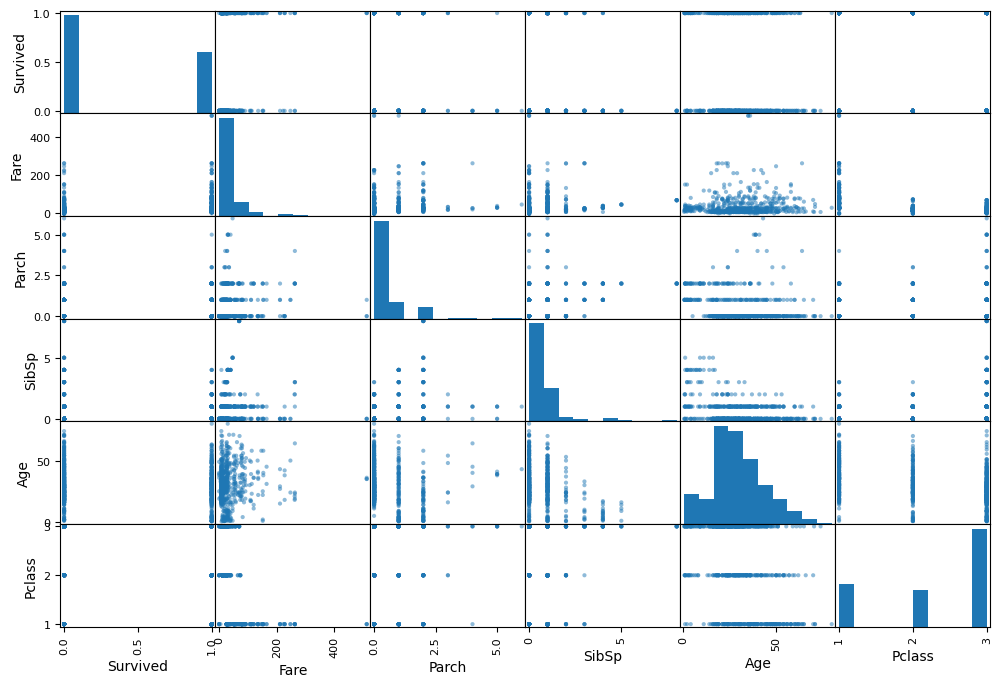

In [ ]:
# Visualize the correlation between attributes 
from pandas.plotting import scatter_matrix

attributes = ['Survived', 'Fare', 'Parch', 'SibSp', 'Age', 'Pclass']

scatter_matrix(titanic[attributes], figsize=(12, 8))

This visualization really isn't so useful because the target attribute is binary, which makes it quite difficult to tease out any real pattern. 

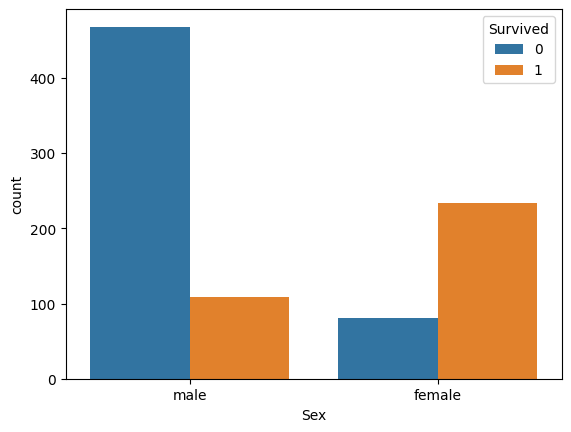

In [ ]:
# Barplot to visualize distribution of categorical attribute for different classes of target 
import seaborn as sns
import matplotlib.pyplot as plt 

def cat_countplot(attribute, tight=False):
    sns.countplot(data=titanic, x=attribute, hue='Survived')

    if tight:
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

cat_countplot('Sex')

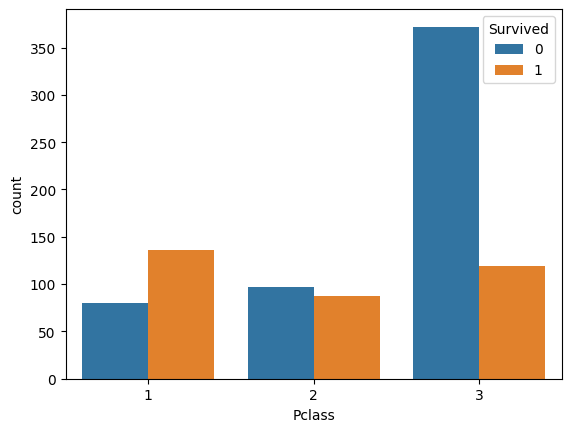

In [ ]:
cat_countplot('Pclass')

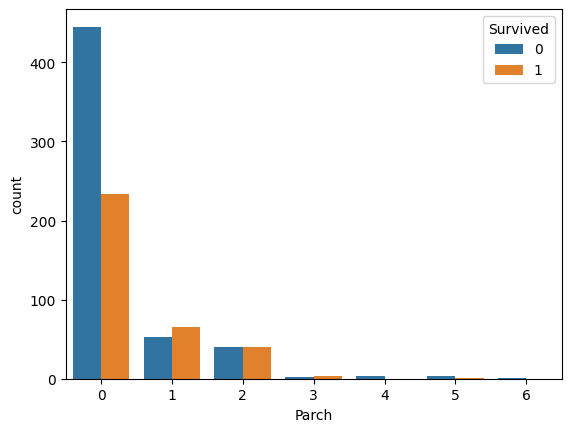

In [ ]:
cat_countplot('Parch')

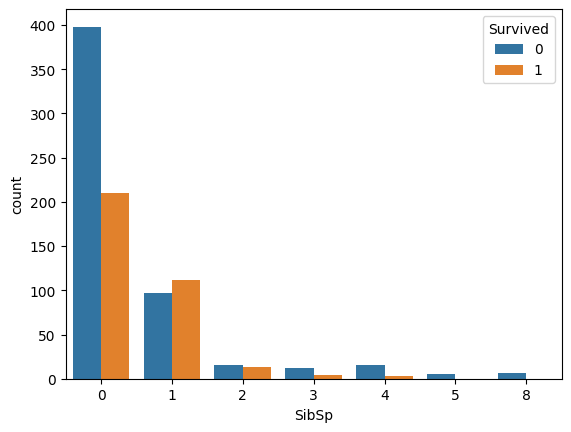

In [ ]:
cat_countplot('SibSp')

It looks like having either one parent/child on the boat, or one sibling/spouse on the boat makes it more likely for the passenger to survive. Maybe that's because smaller families were easier to fit onto the lifeboats. And if an entire family couldn't fit on the lifeboat, then they didn't want to leave anyone behind (so they all stayed on the boat). 

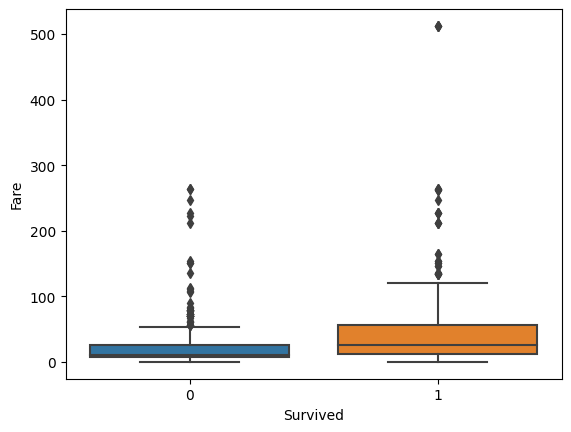

In [ ]:
# Boxplot to visualize numerical variables 
def num_boxplot(attribute):
    sns.boxplot(data=titanic, x='Survived', y=attribute)

num_boxplot('Fare')

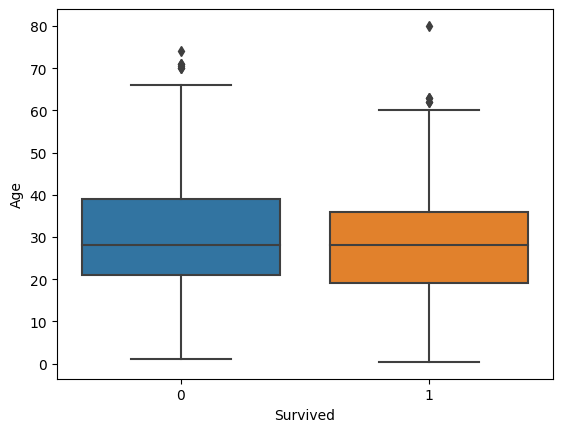

In [ ]:
num_boxplot('Age')

## Attribute combinations 

- Family = Parch + SibSp

In [ ]:
# Create new attribute 
titanic['Family'] = titanic['Parch'] + titanic['SibSp']
titanic[(titanic['Parch']>0) & (titanic['SibSp']>0)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,4
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S,2
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,6
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,5
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S,4


In [ ]:
# Updated correlation matrix 
corr_matrix = titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
Family         0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

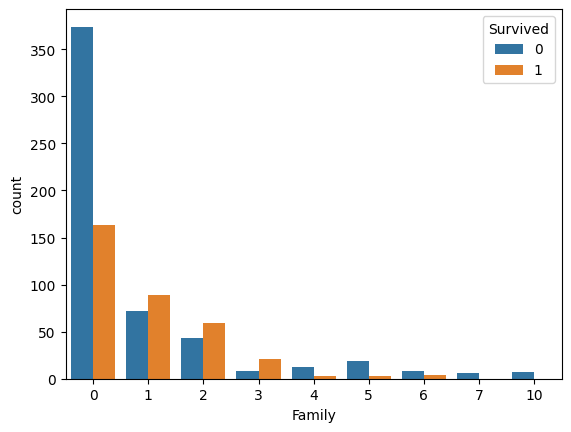

In [ ]:
cat_countplot('Family')

Although the correlation between Survived and Family is not as high as I thought it would be, it still seems like passengers who had families that weren't too big (more than four parents/children/sibling/spouses) were more likely to survive. Is there a strong relationship between Family and other attributes that have high correlation with Survived? Like Fare or Pclass?

In [ ]:
corr_matrix['Family'].sort_values(ascending=False)

Family         1.000000
SibSp          0.890712
Parch          0.783111
Fare           0.217138
Pclass         0.065997
Survived       0.016639
PassengerId   -0.040143
Age           -0.301914
Name: Family, dtype: float64

There is a slight positive correlation between Family and Fare. Meaning passengers with higher fares are more likely to have larger families. And passengers with higher fares are more likely to survive. 

Is it possible to extract titles from passenger names? And compare survival rates between different title classes? 

In [ ]:
titanic['Title'] = titanic['Name'].str.extract(', ([A-Za-z]+)\.', expand=False)
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Ms            1
Lady          1
Name: Title, dtype: int64

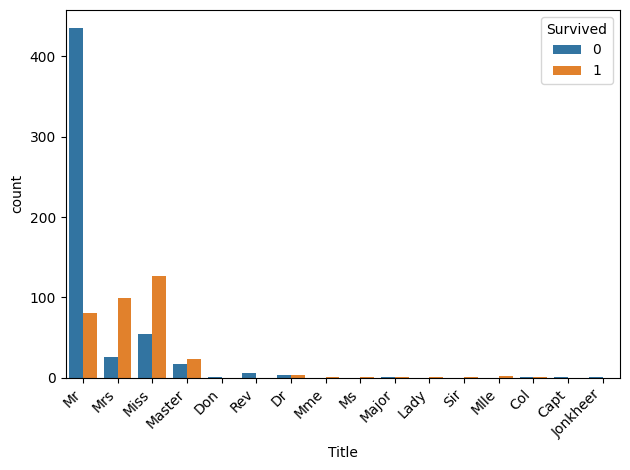

In [ ]:
cat_countplot('Title', tight=True)

We know that women were more likely to survive than men. However, it's interesting to look at the Title value of 'Master'. I'm assuming this is the one category of men who were more likely to survive than not. More likely than not they were wealthier passengers with higher fares/classes. 

# Prepare the data 

In [ ]:
# Separate targets from training data 
titanic = train.drop('Survived', axis=1)
titanic_labels = train['Survived'].copy()
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Let's separate numerical and categorical attributes first 
num_columns = titanic.select_dtypes(include=['number']).columns.tolist()
cat_columns = titanic.select_dtypes(exclude=['number']).columns.tolist()

titanic_num = titanic[num_columns]
titanic_cat = titanic[cat_columns]

print(f"""
Num colums: {num_columns}
Cat columns: {cat_columns}""")


Num colums: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Cat columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## Data cleaning 

In [ ]:
# Find attributes w missing data 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Attributes w/ missing data: 

- Age (714 non-null) --> can impute these missing values, age is likely an important attribute to include. 

- Cabin (204 non-null) --> probably best to drop this column entirely, there's too much missing data 

- Embarked (889 non-null) --> can impute these missing values, there's only 2 missing. 

In [ ]:
# Impute missing values for numerical data 
from sklearn.impute import SimpleImputer

# Mean and median for Age column are very close, shouldn't make a major difference
imputer = SimpleImputer(strategy='median')
imputer.fit(titanic_num)

# To see the medians calculated for each column
imputer.statistics_

# Create transformed dataframe 
X = imputer.transform(titanic_num)
titanic_num_tr = pd.DataFrame(X, columns=titanic_num.columns, index=titanic_num.index)

In [ ]:
# Impute missing values for categorical data 

# Since there are only two missing values for Embarked, let's start w/ mode imputation 
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(titanic_cat)
X = imputer.transform(titanic_cat)
titanic_cat_tr = pd.DataFrame(X, columns=titanic_cat.columns, index=titanic_cat.index)

In [ ]:
# Encoding for categorical attributes 

# Can more easily accomplish this with pd.get_dummies() instead of OneHotEncoder
dummy_variables = pd.get_dummies(titanic_cat_tr[['Sex', 'Embarked']])
titanic_cat_tr = pd.concat([titanic_cat_tr, dummy_variables], axis=1)

titanic_cat_tr.head()

,Name,Sex,Ticket,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S,0,1,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1,0,1,0,0
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S,1,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1,0,0,0,1
4,"Allen, Mr. William Henry",male,373450,B96 B98,S,0,1,0,0,1


## Create custom transformers 

Transformations I want to accomplish: 

- Add Family column = SibSp + Parch

- Add Title column --> extracted from Name 

- Remove columns: PassengerId, Name, Ticket, Cabin 

In [ ]:
# Create custom transformer 
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Column indexes for variables 
def get_col_index(col):
    index = train.columns.get_loc(col)
    return index 

cols = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']  
indices = [get_col_index(col) for col in cols]  
passengerid_ix, survived_ix, name_ix, ticket_ix, cabin_ix, sibsp_ix, parch_ix = indices  

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_family=True, add_title=True):
        self.add_family = add_family
        self.add_title = add_title 

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        family = X[:, sibsp_ix] + X[:, parch_ix]
        title_extract = lambda name: re.search(', ([A-Za-z]+)\.', name).group(1) if re.search(', ([A-Za-z]+)\.', name) else None  
        get_title = np.vectorize(title_extract)  
        title = get_title(X[:, name_ix].astype(str))  

        if self.add_family:
            X = np.c_[X, family]
        if self.add_title:
            X = np.c_[X, title]
        
        remove_col_indices = passengerid_ix, name_ix, ticket_ix, cabin_ix
        X = np.delete(X, remove_col_indices, axis=1)
        return X 

attr_adder = AttributesAdder(add_family=True, add_title=True)
attr_adder.transform(train.values)

array([[0, 3, 'male', ..., 'S', 1, 'Mr'],
       [1, 1, 'female', ..., 'C', 1, 'Mrs'],
       [1, 3, 'female', ..., 'S', 0, 'Miss'],
       ...,
       [0, 3, 'female', ..., 'S', 3, 'Miss'],
       [1, 1, 'male', ..., 'C', 0, 'Mr'],
       [0, 3, 'male', ..., 'Q', 0, 'Mr']], dtype=object)

## Transformation pipelines

We need two separate pipelines, one for numerical columns and one for categorical columns. 

In [ ]:
print(f"""
All columns: {titanic.columns}
Numerical columns: {num_columns}
Categorical columns: {cat_columns}
""")


All columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Numerical columns: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



In [ ]:
# Let's rewrite a separate custom transformer just for numerical attributes 

passengerid_ix, pclass_ix, age_ix, sibsp_ix, parch_ix, fare_ix = 0, 1, 2, 3, 4, 5

class NumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_family=True):
        self.add_family = add_family

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.add_family:
            family = X[:, sibsp_ix] + X[:, parch_ix]
            X = np.c_[X, family]
        
        X = np.delete(X, passengerid_ix, axis=1)
        return X 

In [ ]:
# And another one for categorical attributes 

name_ix, sex_ix, ticket_ix, cabin_ix, embarked_ix = 0, 1, 2, 3, 4

class TitleAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_title=True):
        self.add_title = add_title

    def fit(self, X, y=None):
        return self 

    def transform(self, X, y=None):
        if self.add_title:
            title_extract = lambda name: re.search(', ([A-Za-z]+)\.', name).group(1) if re.search(', ([A-Za-z]+)\.', name) else None  
            get_title = np.vectorize(title_extract)  
            title = get_title(X[:, name_ix].astype(str))
            X = np.c_[X, title] 

        remove_col_indices = name_ix, ticket_ix, cabin_ix
        X = np.delete(X, remove_col_indices, axis=1)
        return X 

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Main steps: impute missing values, column transformations, feature scaling 

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('num_transformer', NumTransformer()), 
    ('std_scaler', StandardScaler())
])

# Categorical pipeline 
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('title_adder', TitleAdder()), 
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the numerical and categorical pipelines 
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns), 
    ('cat', cat_pipeline, cat_columns)
])

titanic_prepared = full_pipeline.fit_transform(titanic)

In [ ]:
# Get categories from One Hot Encoder 
cat_encoder = full_pipeline.named_transformers_['cat']
cat_encoder_feature_names = cat_encoder.named_steps['one_hot_encoder'].get_feature_names_out(['Sex', 'Embarked', 'Title'])  
cat_one_hot_attribs = list(cat_encoder_feature_names)  
cat_one_hot_attribs

['Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Capt',
 'Title_Col',
 'Title_Don',
 'Title_Dr',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Master',
 'Title_Miss',
 'Title_Mlle',
 'Title_Mme',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_None',
 'Title_Rev',
 'Title_Sir']

Final columns after full pipeline transformation: 

- Numerical: Pclass, Age, SibSp, Parch, Fare, Family (extra)

- Categorical: Sex, Embarked, Title (extra)

- One-Hot encoded: (above)

In [ ]:
final_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family'] + cat_one_hot_attribs
final_attribs

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Family',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Capt',
 'Title_Col',
 'Title_Don',
 'Title_Dr',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Master',
 'Title_Miss',
 'Title_Mlle',
 'Title_Mme',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_None',
 'Title_Rev',
 'Title_Sir']

# Explore many different models 

Different models to try: Logistic Regression, Decision Tree, Random Forest

In [ ]:
# Utility function for model evaluation 
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [ ]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import cross_val_score
import os 
import joblib 

# Directory to store models 
os.makedirs('models', exist_ok=True)
  
# logreg = LogisticRegression()  
# logreg.fit(titanic_prepared, titanic_labels)
# joblib.dump(logreg, 'models/logreg.joblib')
logreg = joblib.load('models/logreg.joblib')

titanic_predictions = logreg.predict(titanic_prepared)
logreg_accuracy = accuracy_score(titanic_labels, titanic_predictions)
logreg_accuracy

0.8316498316498316

In [ ]:
# Cross-validation on Logistic Regression

# Using accuracy as evaluation metric for now
logreg_scores = cross_val_score(
    logreg, titanic_prepared, titanic_labels, scoring='accuracy', cv=10
)
  
display_scores(logreg_scores)

Scores: [0.82222222 0.85393258 0.7752809  0.85393258 0.80898876 0.7752809
 0.80898876 0.82022472 0.86516854 0.87640449]
Mean: 0.8260424469413234
Standard Deviation: 0.03377346924254331


Logistic regression: 

- Training set accuracy score: 83.1%

- Mean cross-validation accuracy: 82.6% 

Seems to perform very well on validation sets, meaning we're not overfitting. 

In [ ]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier 

# tree = DecisionTreeClassifier()
# tree.fit(titanic_prepared, titanic_labels)
# joblib.dump(tree, 'models/tree.joblib')
tree = joblib.load('models/tree.joblib')

titanic_predictions = tree.predict(titanic_prepared)
accuracy_score(titanic_labels, titanic_predictions)

0.9820426487093153

In [ ]:
# Cross-validation on Logistic Regression
tree_scores = cross_val_score(
    tree, titanic_prepared, titanic_labels, scoring='accuracy', cv=10
)
display_scores(tree_scores)

Scores: [0.73333333 0.80898876 0.6741573  0.82022472 0.78651685 0.78651685
 0.84269663 0.70786517 0.79775281 0.80898876]
Mean: 0.7767041198501873
Standard Deviation: 0.051093006447375


Decision tree classifier: 

- Training set accuracy score: 98.2%

- Mean cross-validation accuracy: 77.7% 

We're badly overfitting using a decision tree. 

In [ ]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier()
# forest.fit(titanic_prepared, titanic_labels)
# joblib.dump(forest, 'models/forest.joblib')
forest = joblib.load('models/forest.joblib')

titanic_predictions = forest.predict(titanic_prepared)
accuracy_score(titanic_labels, titanic_predictions)

0.9820426487093153

In [ ]:
# Cross validation 
forest_scores = cross_val_score(
    forest, titanic_prepared, titanic_labels, scoring='accuracy', cv=10
)
display_scores(forest_scores)

Scores: [0.73333333 0.85393258 0.75280899 0.83146067 0.85393258 0.86516854
 0.78651685 0.74157303 0.80898876 0.82022472]
Mean: 0.8047940074906368
Standard Deviation: 0.0464554770675867


Random forest classifier: 

- Training set accuracy score: 98.2%

- Mean cross-validation accuracy: 80.9% 

Random forest is still overfitting, but not as bad as the decision tree, and it gets fairly close to the logistic regression mean cross-validation score of 82.6%. 

# Fine-tune your models

Let's work with our Random Forest model going forward, this was the most promising. Let's use Randomized Search to perform hyperparameter tuning. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.arange(100, 1000, 100), 
    'max_depth': [None, 5, 10, 20], 
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False]
}

forest = RandomForestClassifier()
rnd_search = RandomizedSearchCV(
    forest, 
    param_distributions=param_grid, 
    n_iter=50, 
    cv=5, 
    scoring='accuracy', 
    verbose=2, 
    random_state=42 
)

# rnd_search.fit(titanic_prepared, titanic_labels)
# joblib.dump(rnd_search, 'models/forest_rnd_search.joblib')
rnd_search = joblib.load('models/forest_rnd_search.joblib')


# Get the best parameters and best score  
best_params = rnd_search.best_params_  
best_score = rnd_search.best_score_  
  
# Print the best parameters and best score  
print("Best Parameters: ", best_params)  
print("Best Score: ", best_score)  

Best Parameters:  {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}
Best Score:  0.8338710689849979


In [ ]:
# Feature importances 
feature_importances = rnd_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, final_attribs), reverse=True)

[(0.21933871463241422, 'Title_Mr'),
 (0.1550229614394889, 'Sex_female'),
 (0.13424213606148802, 'Sex_male'),
 (0.10078948382267294, 'Pclass'),
 (0.09071485263541845, 'Fare'),
 (0.05418826794043464, 'Family'),
 (0.05342501841607293, 'Title_Mrs'),
 (0.04374739900304225, 'Age'),
 (0.04058250350860851, 'Title_Miss'),
 (0.040373409203596604, 'SibSp'),
 (0.020871090050703325, 'Parch'),
 (0.012839905064391645, 'Embarked_S'),
 (0.011161794422611004, 'Title_Master'),
 (0.008724074394940036, 'Embarked_C'),
 (0.005081193250995177, 'Embarked_Q'),
 (0.0026448840695114553, 'Title_Rev'),
 (0.002053498178081265, 'Title_Dr'),
 (0.0007328430433969158, 'Title_Don'),
 (0.0005005214545715543, 'Title_Ms'),
 (0.0004943087860167605, 'Title_Major'),
 (0.00047453488846483055, 'Title_Capt'),
 (0.00043535876593979456, 'Title_Mlle'),
 (0.000418049927495426, 'Title_Col'),
 (0.00039144082164008974, 'Title_None'),
 (0.0003224266625879066, 'Title_Mme'),
 (0.0003221495997633336, 'Title_Sir'),
 (0.00010250795812251973, 

In [ ]:
# Creating new transformer in preparation pipeline to only select the most important attributes 

def indices_of_top_k(arr, k):
    return np.argsort(arr)[-k:]  

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self 

    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 4,  0,  7,  6, 22])

In [ ]:
np.array(final_attribs)[top_k_feature_indices]

array(['Fare', 'Pclass', 'Sex_male', 'Sex_female', 'Title_Mr'],
      dtype='<U14')

In [ ]:
# Double check that these are indeed the top k features 
sorted(zip(feature_importances, final_attribs), reverse=True)[:k]

[(0.21933871463241422, 'Title_Mr'),
 (0.1550229614394889, 'Sex_female'),
 (0.13424213606148802, 'Sex_male'),
 (0.10078948382267294, 'Pclass'),
 (0.09071485263541845, 'Fare')]

In [ ]:
# Create a new pipeline that runs previously defined prep pipeline and adds top k feature selection 
# Also, build in prediction 

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline), 
    ('feature_selection', TopFeatureSelector(feature_importances, k)), 
    ('forest_classifier', RandomForestClassifier(**rnd_search.best_params_))
])

prepare_select_and_predict_pipeline.fit(titanic, titanic_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_transformer',
                                                                   NumTransformer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('title_adder',
                                                                   Tit...
       8.72407439e-03, 5.08119325e-03, 1.28399051e-02, 4.74534888e-04,
       4.18049927e-04, 7.32843043e-04, 2.05349818e-03, 1.02507958e-04,
       4.67199753e-06, 4.94308786e-04, 1.11617944e-02, 4.05825035e-02,
       4.35358766e-04, 3.22426663e-04, 2.19338715e-01, 5.34250184e-02,
       5.00521455e-04, 3.91440822e-04, 2.64488407e-03, 3.22149600e-04]),
                                    k=5)),
                ('forest_classifier',
                 RandomForestClassifier(max_depth=5, max_features='log2'))])

In [ ]:
# Try the full pipeline 
some_data = titanic.iloc[:4,]
some_labels = titanic_labels[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [0 1 1 1]
Labels:		 [0, 1, 1, 1]


In [ ]:
# Explore preparation options using GridSearchCV

from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'feature_selection__k': list(range(1, len(feature_importances) + 1))
    }
]

grid_search_prep = GridSearchCV(
    prepare_select_and_predict_pipeline, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    verbose=2
)

# grid_search_prep.fit(titanic, titanic_labels)

# joblib.dump(grid_search_prep, 'models/grid_search_prep.joblib')
grid_search_prep = joblib.load('models/grid_search_prep.joblib')
grid_search_prep

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_transformer',
                                                                                          NumTransformer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['PassengerId',
                                                                          'Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_fr...
       4.35358766e-04, 3.22426663e-04, 2.19338715e-01, 5.34250184e-02,
       5.00521455e-04, 3.91440822e-04, 2.64488407e-03, 3.22149600e-04]),
                                                           k=5)),
                                       ('forest_classifier',
                                        RandomForestClassifier(max_depth=5,
                                                               max_features='log2'))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28]}],
             scoring='accuracy', verbose=2)

In [ ]:
grid_search_prep.best_params_

{'feature_selection__k': 8}

In [ ]:
rnd_search.best_params_

{'n_estimators': 100,
 'max_features': 'log2',
 'max_depth': 5,
 'bootstrap': True}

## Final parameters for model 

Using Random Forest Classifier: 

- Best Parameters:  {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}

- {'feature_selection__k': 8} --> update k=8 in prepare_select_and_predict_pipeline 

In [ ]:
# Updating full pipeline 

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline), 
    ('feature_selection', TopFeatureSelector(feature_importances, 8)),  
    ('forest_classifier', RandomForestClassifier(**rnd_search.best_params_))
])

prepare_select_and_predict_pipeline.fit(titanic, titanic_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_transformer',
                                                                   NumTransformer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('title_adder',
                                                                   Tit...
       8.72407439e-03, 5.08119325e-03, 1.28399051e-02, 4.74534888e-04,
       4.18049927e-04, 7.32843043e-04, 2.05349818e-03, 1.02507958e-04,
       4.67199753e-06, 4.94308786e-04, 1.11617944e-02, 4.05825035e-02,
       4.35358766e-04, 3.22426663e-04, 2.19338715e-01, 5.34250184e-02,
       5.00521455e-04, 3.91440822e-04, 2.64488407e-03, 3.22149600e-04]),
                                    k=8)),
                ('forest_classifier',
                 RandomForestClassifier(max_depth=5, max_features='log2'))])

## Generate predictions on test set

In [ ]:
predictions = prepare_select_and_predict_pipeline.predict(test)

In [ ]:
# Ensure we have enough predictions 

print(f"""
Shape of test set: {test.shape}
Number of predictions: {len(predictions)}
""")


Shape of test set: (418, 11)
Number of predictions: 418



In [ ]:
# Combine PassengerID and predictions 

predictions = pd.DataFrame(predictions, columns=['Survived'])
test_passenger_ids = test['PassengerId'].copy()

submission = pd.concat([test_passenger_ids, predictions], axis=1)

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission.shape

(418, 2)

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
submission.to_csv('submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dcea83c7-d1ad-4035-ad29-dbde1aec4552' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>